In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/all-data.csv',encoding='latin1')
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [3]:
df1 = df.rename(columns={
    'neutral': 'sentiment',
    'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .': 'Message'
})

 **Renamed the columns**

In [4]:
df1

,sentiment,Message
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...


In [5]:
df1.duplicated().sum()

6

In [6]:
df1.drop_duplicates(inplace=True)

In [7]:
df1.shape

(4839, 2)

**Duplicate values have been identified and have been removed.**

In [8]:
df.index=range(len(df))
df1["Message"].apply(lambda x:len(x.split(" "))).sum()

111786

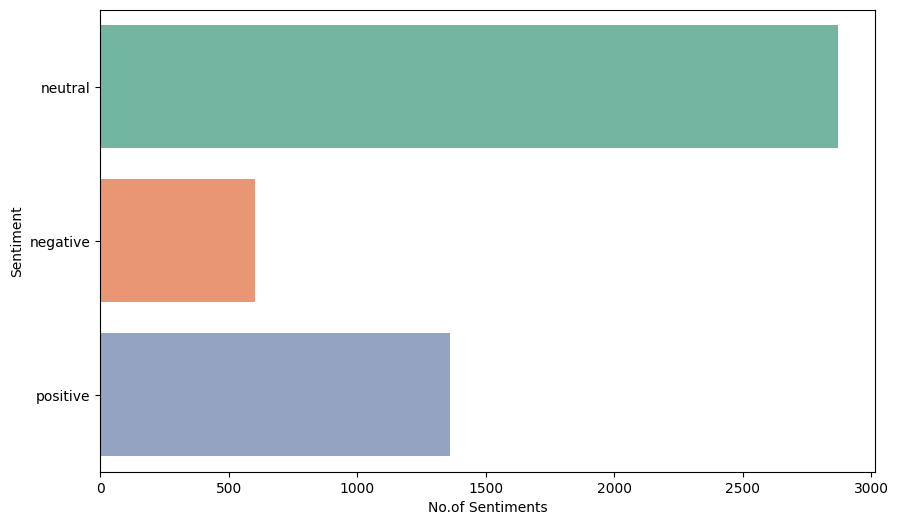

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(df1["sentiment"],palette="Set2")
plt.ylabel("Sentiment")
plt.xlabel("No.of Sentiments")
plt.show()

In [10]:
df1['sentiment'].value_counts()

,count
sentiment,
neutral,2872
positive,1363
negative,604


# **Preprocessing Method**

**Character-level cleaning**

This process cleans the text data by removing all characters except alphabets and spaces using regular expressions. It helps in reducing noise from the text.



In [11]:
import re
def remove_unnecessary_characters(text):
  cleaned_text=re.sub(r'[^a-zA-Z\s]','',text)
  return cleaned_text
df1['Cleaned_text']=df1['Message'].apply(remove_unnecessary_characters)

This process converts all text to lowercase, ensuring uniformity across the dataset. It helps in avoiding duplication of words that differ only in case

In [12]:
def to_lowercase(text):
  return text.lower()
df1['Cleaned_text']=df1['Cleaned_text'].apply(to_lowercase)
df1.head()

,sentiment,Message,Cleaned_text
0,neutral,Technopolis plans to develop in stages an area...,technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...,the international electronic industry company ...
2,positive,With the new production plant the company woul...,with the new production plant the company woul...
3,positive,According to the company 's updated strategy f...,according to the company s updated strategy fo...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,financing of aspocomp s growth aspocomp is agg...


# Tokenization

This process splits the cleaned text into individual words or tokens using the split() function

In [13]:
def tokenize(text):
  return text.split()
df1['tokens']=df1['Cleaned_text'].apply(tokenize)
df1.head(2)

,sentiment,Message,Cleaned_text,tokens
0,neutral,Technopolis plans to develop in stages an area...,technopolis plans to develop in stages an area...,"[technopolis, plans, to, develop, in, stages, ..."
1,negative,The international electronic industry company ...,the international electronic industry company ...,"[the, international, electronic, industry, com..."


# Removing stopwords

This process removes common English stopwords (like "the", "is", "and") from the tokenized text using NLTK’s predefined list

In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
def remove_stopwords(tokens):
  return [word for word in tokens if word not in stop_words]
df1['tokens']=df1['tokens'].apply(remove_stopwords)
df1.head(2)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,sentiment,Message,Cleaned_text,tokens
0,neutral,Technopolis plans to develop in stages an area...,technopolis plans to develop in stages an area...,"[technopolis, plans, develop, stages, area, le..."
1,negative,The international electronic industry company ...,the international electronic industry company ...,"[international, electronic, industry, company,..."


# Lemmatization

lemmatization is the process which reduces words to their base or dictionary form (lemma). For example, words like "running", "ran", and "runs" are converted to "run". Lemmatization helps in normalizing the text and improving the model's ability to understand word meanings and relationships.










In [15]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
def lemmatize_words(tokens):
  return [lemmatizer.lemmatize(word) for word in tokens]
df1['tokens']=df1['tokens'].apply(lemmatize_words)
df1.head(2)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,sentiment,Message,Cleaned_text,tokens
0,neutral,Technopolis plans to develop in stages an area...,technopolis plans to develop in stages an area...,"[technopolis, plan, develop, stage, area, less..."
1,negative,The international electronic industry company ...,the international electronic industry company ...,"[international, electronic, industry, company,..."


In [16]:
df1.isnull().sum()

,0
sentiment,0
Message,0
Cleaned_text,0
tokens,0


**N-Gram Frequency Visualization**

N-Gram Frequency Visualization uses CountVectorizer to extract and count the frequency of bi-grams (two-word phrases) from the cleaned text corpus. It then visualizes the top 25 most frequent bi-grams using a horizontal bar chart. This helps identify common word combinations and patterns in the dataset.

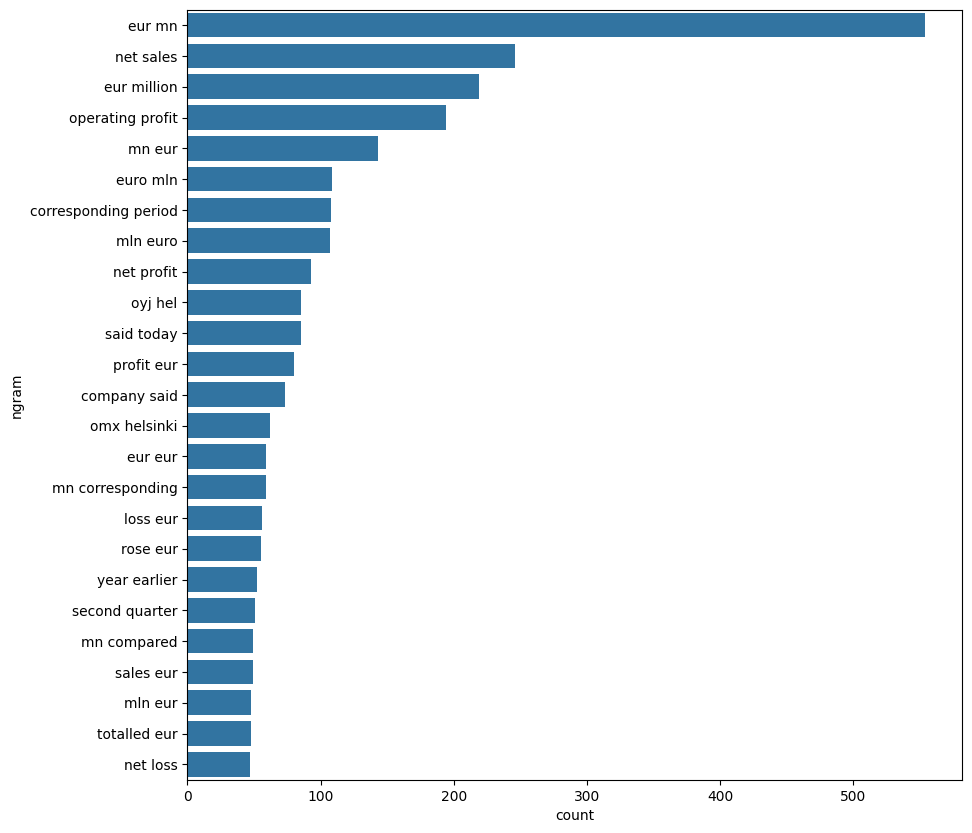

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
def plot_top_ngrams(corpus,ngram_range=(2,2),num_ngrams=25):
  vectorizer=CountVectorizer(ngram_range=ngram_range,stop_words="english")
  X=vectorizer.fit_transform(corpus)
  ngram_count=X.sum(axis=0).A1
  ngram_names=vectorizer.get_feature_names_out()

  ngram_df=pd.DataFrame({"ngram":ngram_names,"count":ngram_count})
  top_ngrams=ngram_df.nlargest(num_ngrams,"count")

  plt.figure(figsize=(10,10))
  sns.barplot(y="ngram",x="count",data=top_ngrams)
  plt.show()
corpus=df1["Cleaned_text"].tolist()
# The issue is in this line. 'ngram_range' is a parameter, not a function.
# Change 'ngram_range(2, 2)' to '(2, 2)' to pass the tuple directly.
plot_top_ngrams(corpus, ngram_range=(2, 2))

# **Vectorization**

**TF-IDF Vectorization**

TF-IDF Vectorization converts the cleaned text into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency), which highlights important words by balancing their frequency across documents



In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
tfidf_matrix=tfidf.fit_transform(df1["Cleaned_text"])
# Changed 'pd.Dataframe' to 'pd.DataFrame' to use the correct attribute name
tfidf_df=pd.DataFrame(tfidf_matrix.toarray(),columns=tfidf.get_feature_names_out())
tfidf_df.head()

,aaland,aalborg,aalto,aaltonen,aaron,aava,aazhang,ab,abb,abbott,...,zinc,zinclead,zip,zloty,zoltan,zone,zoo,zte,zu,zxx
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Bag of Words**

This process converts the cleaned text into a Bag of Words (BoW) representation, where each document is represented by the frequency of words it contains

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
bow_matrix=vectorizer.fit_transform(df1["Cleaned_text"])
bow_df=pd.DataFrame(bow_matrix.toarray(),columns=vectorizer.get_feature_names_out())
bow_df.head()

,aaland,aalborg,aalto,aaltonen,aaron,aava,aazhang,ab,abb,abbott,...,zinc,zinclead,zip,zloty,zoltan,zone,zoo,zte,zu,zxx
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Word2Vec Embedding**

the Word2Vec model to convert words into dense vector representations, capturing semantic relationships between them.

In [20]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd

word2vec_model = Word2Vec(sentences=df1["tokens"], vector_size=100, window=5, min_count=1, sg=0)

def get_word2vector(text):
  # Check if the word is in the model's vocabulary
  word_vectors = [word2vec_model.wv[word] for word in text if word in word2vec_model.wv]
  if len(word_vectors) == 0:
    return np.zeros(word2vec_model.vector_size)
  else:
    return np.mean(word_vectors, axis=0)

# Use df1["Cleaned_text"] instead of df["Cleaned_text"]
word2vec_matrix = np.array([get_word2vector(text.split()) for text in df1["Cleaned_text"]])
print(word2vec_matrix.shape)

(4839, 100)


In [21]:
!pip install --upgrade numpy
!pip install --upgrade gensim

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  A

**Document Vectorization**

The text data is then transformed into vectors by averaging the word embeddings of all words in a document, resulting in a document-level vector representation.

In [22]:
import numpy as np
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
tagged_data=[TaggedDocument(words=tokens,tags=[str(i)]) for i,tokens in enumerate(df1["tokens"])]
doc2vec_model=Doc2Vec(vector_size=100,window=5,min_count=1,dm=0,epochs=100)
doc2vec_model.build_vocab(tagged_data)
doc2vec_model.train(tagged_data,total_examples=doc2vec_model.corpus_count,epochs=doc2vec_model.epochs)

# Define get_doc2vec_vector if not already defined
def get_doc2vec_vector(i):
  return doc2vec_model.dv[str(i)]  # Access document vector by tag

# Use df1["tokens"] instead of df["tokens"]
doc2vec_matrix=np.array([get_doc2vec_vector(i) for i in range (len(df1["tokens"]))])
print(doc2vec_matrix.shape)

(4839, 100)


In [23]:
glove_file_path = '/content/glove.6B.100d.txt'
glove_dict={}


In [24]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2025-04-15 04:46:58--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-04-15 04:46:58--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-04-15 04:46:59--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

**GloVe Embedding **

This process loads pre-trained GloVe word embeddings to convert words into vector representations, where each word is mapped to a dense vector of fixed dimensions (e.g., 100).

In [25]:
glove_file_path = '/content/glove.6B.100d.txt'  # Make sure this path is correct
glove_dict = {}

with open(glove_file_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], 'float32')
        glove_dict[word] = vector

def get_glove_vector(text):
    words = text.split()
    word_vectors = [glove_dict.get(word, np.zeros(100)) for word in words]
    return np.mean(word_vectors, axis=0)

glove_matrix = np.array([get_glove_vector(text) for text in df1["Cleaned_text"]])
print(glove_matrix.shape)

(4839, 100)


# **Machine Learning Models**

# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Target and features
y = df1['sentiment'].values
# Use the 'Statement' column instead of 'stemmed_statement'
X = tfidf.fit_transform(df1["Message"])  # or "Sentence" if unprocessed

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print results
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Train Accuracy: 0.8701
Test Accuracy: 0.7459


# DecisionTree

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Target and features
y = df1['sentiment'].values
X = tfidf.fit_transform(df1["Message"])  # or "Sentence"

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print results
print(f"Decision Tree Train Accuracy: {train_accuracy:.4f}")
print(f"Decision Tree Test Accuracy: {test_accuracy:.4f}")


Decision Tree Train Accuracy: 0.9997
Decision Tree Test Accuracy: 0.6901


# RandomForest

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Target and features
y = df1['sentiment'].values
X = tfidf.fit_transform(df1["Message"])  # or "Sentence"

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print results
print(f"Random Forest Train Accuracy: {train_accuracy:.4f}")
print(f"Random Forest Test Accuracy: {test_accuracy:.4f}")


Random Forest Train Accuracy: 0.9997
Random Forest Test Accuracy: 0.7386


# SVM

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Target and features
y = df1['sentiment'].values
X = tfidf.fit_transform(df1["Message"])  # or "Sentence"

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train SVM
svm_model = SVC(kernel='linear', random_state=42)  # Use 'linear' kernel, can change to 'rbf' or 'poly'
svm_model.fit(X_train, y_train)

# Predictions
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print results
print(f"SVM Train Accuracy: {train_accuracy:.4f}")
print(f"SVM Test Accuracy: {test_accuracy:.4f}")


SVM Train Accuracy: 0.9243
SVM Test Accuracy: 0.7655


In [30]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import doc2vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument



In [32]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [33]:
sentiment = {"positive": 2, "neutral": 1, "negative": 0}
# Assuming 'neutral' is the column containing sentiment labels
df['sentiment_label'] = [sentiment[item] for item in df['neutral']]

In [34]:
import re
from bs4 import BeautifulSoup
def cleanText(text):
  text=BeautifulSoup(text,"lxml").text
  text=re.sub(r"\|\|\|",r" ",text)
  text=re.sub(r"http\S+",r"<URL>",text)
  text=text.lower()
  text=text.replace("x","")
  return text
df1["Message"]=df1["Message"].apply(cleanText)

In [35]:
import nltk
nltk.download('punkt_tab') # Download the required 'punkt_tab' data package

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [36]:
from tensorflow.keras.preprocessing.sequence import pad_sequences # Import the pad_sequences function

df1["Message"]=df1["Message"].apply(cleanText)
train,test=train_test_split(df1,test_size=0.000001,random_state=42)
from nltk.corpus import stopwords
def tokenize_text(text):
  tokens=[]
  for sent in nltk.sent_tokenize(text):
    for word in nltk.word_tokenize(sent):
      if len(word)<=0:
        continue
      tokens.append(word.lower())
  return tokens
train_tagged=train.apply(
    lambda r:TaggedDocument(words=tokenize_text(r["Message"]),tags=[r.Message]),axis=1
)
test_tagged=test.apply(
    lambda r:TaggedDocument(words=tokenize_text(r["Message"]),tags=[r.Message]),axis=1
)
max_features=500000
MAX_SEQUENCE_LENGTH=50
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df1["Message"].values)
X=tokenizer.texts_to_sequences(df1["Message"].values)
X=pad_sequences(X) # Now pad_sequences is defined and can be used

In [37]:
import pickle
with open("tokenizer.pickle","wb") as handle:
  pickle.dump(tokenizer,handle,protocol=pickle.HIGHEST_PROTOCOL)

In [38]:
X=tokenizer.texts_to_sequences(df1["Message"].values)
X=pad_sequences(X,maxlen=MAX_SEQUENCE_LENGTH)
print("shape of data tensor: ",X.shape)

shape of data tensor:  (4839, 50)


In [39]:
train_tagged.values

array([TaggedDocument(words=['on', 'dec.', '1', ',', 'grimaldi', 'acquired', '1.5', 'million', 'shares', 'and', 'a', '50.1-percent', 'stake', 'in', 'finnlines', '.'], tags=['on dec. 1 , grimaldi acquired 1.5 million shares and a 50.1-percent stake in finnlines .']),
       TaggedDocument(words=['the', 'etracted', 'filtrates', 'are', 'very', 'high', 'in', 'clarity', 'while', 'the', 'dried', 'filter', 'cakes', 'meet', 'required', 'transport', 'moisture', 'limits', '(', 'tmls', ')', 'for', 'their', 'ore', 'grades', '.'], tags=['the etracted filtrates are very high in clarity while the dried filter cakes meet required transport moisture limits (tmls)for their ore grades .']),
       TaggedDocument(words=['the', 'use', 'case', 'dramatically', 'narrows', 'if', 'you', 'go', 'only', 'with', 'the', 'hot', 's', 'ltd', '.'], tags=['the use case dramatically narrows if you go only with the hot s ltd.']),
       ...,
       TaggedDocument(words=['purchase', 'it', 'for', 'the', '12mp', 'snapper', ',

In [40]:
!pip install --upgrade gensim

In [41]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument  # Import TaggedDocument from gensim.models.doc2vec
from tqdm import tqdm

d2v_model = Doc2Vec(dm=1, vector_size=20, dm_mean=1, window=8, min_count=1, epochs=15)
d2v_model.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 4838/4838 [00:00<00:00, 4180478.52it/s]


In [42]:
d2v_model=Doc2Vec(dm=1,vector_size=20,dm_mean=1,window=8,min_count=1,workers=1)
d2v_model.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 4838/4838 [00:00<00:00, 2655678.94it/s]


In [43]:
for epoch in range(30):
  d2v_model.train(utils.shuffle([x for x in tqdm(train_tagged.values)]),total_examples=len(train_tagged.values),epochs=1)
  d2v_model.alpha-=0.002
  d2v_model.min_alpha=d2v_model.alpha

100%|██████████| 4838/4838 [00:00<00:00, 2464121.77it/s]


In [44]:
print(d2v_model)

Doc2Vec<dm/m,d20,n5,w8,s0.001>


In [45]:
len(d2v_model.wv)

11680

In [46]:
embedding_matrix=np.zeros((len(d2v_model.wv)+1,20))
for i,vec in enumerate(d2v_model.docvecs.vectors):
  while i in vec<=1000:
    embedding_matrix[i]=vec

In [47]:
d2v_model.wv.most_similar(positive=["profit"],topn=10)

[('4.9', 0.9839741587638855),
 ('loss', 0.9807642102241516),
 ('profits', 0.9717163443565369),
 ('margin', 0.9715719819068909),
 ('3.5', 0.9683552384376526),
 ('rose', 0.9681100249290466),
 ('interest', 0.967931866645813),
 ('windows', 0.9662765264511108),
 ('3.2', 0.9647189974784851),
 ('saw', 0.9636202454566956)]

In [48]:
d2v_model.wv.most_similar(negative=["profit"],topn=10)

[('has80', 0.8001894950866699),
 ('12-20', 0.7734230756759644),
 ('finnish-russian', 0.7544903755187988),
 ('organised', 0.714665949344635),
 ('guinea-based', 0.6831845641136169),
 ('shell', 0.6545920968055725),
 ('swift', 0.6217427849769592),
 ('pressurized', 0.5982208251953125),
 ('201.4', 0.5878851413726807),
 ('-0.6', 0.5586985349655151)]

In [49]:
d2v_model.wv.most_similar(positive=["investment"],topn=10)

[('friedlander', 0.9936084151268005),
 ('foreign', 0.9933258295059204),
 ('aspo', 0.9921848177909851),
 ('days', 0.992172360420227),
 ('association', 0.9918094277381897),
 ('website', 0.99165940284729),
 ('cost-efficient', 0.991520881652832),
 ('committee', 0.9913977980613708),
 ('stockmann', 0.9913270473480225),
 ('acquired', 0.9911203384399414)]

In [50]:
#Plot similarity word in Doc2vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding,Input

#Initialize model
model = Sequential()

#Input layer to define the shape of the input data
model.add(Input(shape=(50,)))# assuming the length as 50

#Embed word vectors (input_length is defined here)
model.add(Embedding(input_dim=len(d2v_model.wv) + 1,output_dim=20,weights=[embedding_matrix]))

model.add(LSTM(50,return_sequences=False))

model.add(Dense(3,activation="softmax"))
model.summary()
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 50, 20)         │       233,620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 50)             │        14,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 247,973 (968.64 KB)

 Trainable params: 247,973 (968.64 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# to train the model split the datapoints
Y = pd.get_dummies(df1['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15, random_state = 40)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(4113, 50) (4113, 3)
(726, 50) (726, 3)


In [52]:
batch_size = 32 # 32 batches are made
history=model.fit(X_train, Y_train, epochs = 50, batch_size=batch_size, verbose = 2)

Epoch 1/50
129/129 - 7s - 57ms/step - accuracy: 0.6093 - loss: 0.8945
Epoch 2/50
129/129 - 2s - 19ms/step - accuracy: 0.7017 - loss: 0.6837
Epoch 3/50
129/129 - 2s - 15ms/step - accuracy: 0.8011 - loss: 0.4768
Epoch 4/50
129/129 - 2s - 14ms/step - accuracy: 0.8913 - loss: 0.2901
Epoch 5/50
129/129 - 2s - 16ms/step - accuracy: 0.9475 - loss: 0.1604
Epoch 6/50
129/129 - 3s - 21ms/step - accuracy: 0.9669 - loss: 0.1083
Epoch 7/50
129/129 - 2s - 19ms/step - accuracy: 0.9825 - loss: 0.0619
Epoch 8/50
129/129 - 2s - 18ms/step - accuracy: 0.9869 - loss: 0.0492
Epoch 9/50
129/129 - 1s - 11ms/step - accuracy: 0.9886 - loss: 0.0442
Epoch 10/50
129/129 - 1s - 6ms/step - accuracy: 0.9937 - loss: 0.0302
Epoch 11/50
129/129 - 1s - 10ms/step - accuracy: 0.9922 - loss: 0.0305
Epoch 12/50
129/129 - 1s - 10ms/step - accuracy: 0.9944 - loss: 0.0230
Epoch 13/50
129/129 - 1s - 6ms/step - accuracy: 0.9942 - loss: 0.0227
Epoch 14/50
129/129 - 1s - 6ms/step - accuracy: 0.9944 - loss: 0.0205
Epoch 15/50
129/12

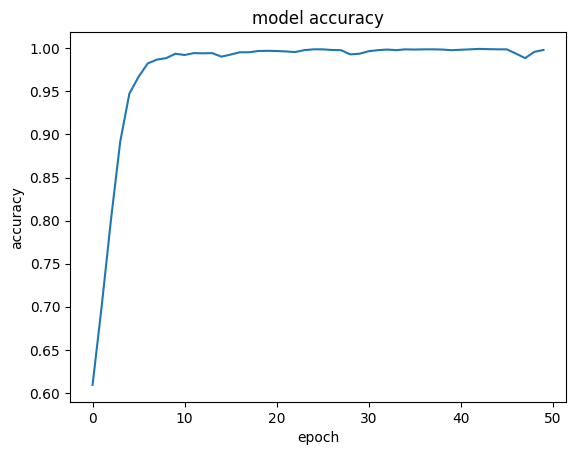

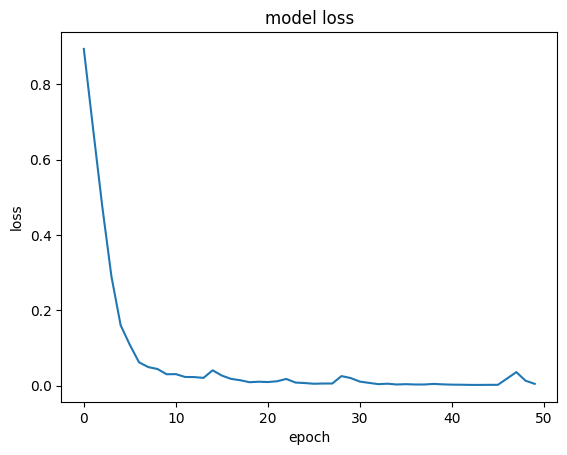

<Figure size 640x480 with 0 Axes>

In [53]:
#Plot the results (accuracy and Loss)

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
plt.savefig('model_accuracy.png')

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
plt.savefig('model_loss.png')

In [54]:
yhat_probs = model.predict(X_test, verbose=0)
print(yhat_probs)
yhat_classes = np.argmax(yhat_probs,axis=1)
print(yhat_classes)

[[3.25647212e-04 9.98683393e-01 9.90972854e-04]
 [2.36358605e-02 3.10288295e-02 9.45335329e-01]
 [1.14765324e-04 9.98613477e-01 1.27174309e-03]
 ...
 [7.71608939e-06 1.19840399e-06 9.99991059e-01]
 [7.99699119e-05 1.87167476e-04 9.99732792e-01]
 [4.66914207e-04 9.99286354e-01 2.46764277e-04]]
[1 2 1 1 0 1 2 1 2 0 1 2 2 1 2 2 2 1 1 1 2 1 2 1 1 1 1 0 2 1 2 0 1 1 1 1 1
 1 2 1 1 1 2 1 1 2 0 1 1 1 1 2 2 1 1 2 0 0 1 2 1 2 1 1 2 2 1 2 2 0 0 0 1 0
 2 1 1 1 1 1 2 2 2 2 2 1 1 2 1 0 2 1 2 1 1 1 2 1 1 2 1 1 0 1 1 1 2 2 1 1 1
 2 1 0 1 1 0 2 2 1 1 1 1 2 2 2 1 1 2 1 2 0 2 1 2 1 2 2 2 2 1 2 0 1 1 1 2 1
 0 2 2 2 1 2 1 2 0 1 1 1 1 1 1 1 2 1 1 2 1 1 2 1 1 2 2 2 1 1 2 1 1 2 1 2 1
 1 1 1 2 1 2 1 2 2 1 2 2 1 1 0 0 2 2 1 1 1 0 2 1 1 1 2 1 1 1 1 1 1 2 1 2 1
 0 1 1 2 1 0 1 2 1 2 1 0 2 1 1 1 1 1 1 1 1 0 2 2 2 1 2 2 1 1 1 1 0 1 2 1 2
 0 1 1 1 1 1 1 2 1 2 2 0 1 0 1 1 1 1 0 2 0 0 1 2 1 1 1 2 1 1 2 1 2 1 2 1 2
 1 2 1 2 2 0 0 2 1 2 1 2 1 2 0 1 1 2 2 1 0 0 2 1 2 1 1 2 1 2 2 2 1 1 2 0 1
 2 1 2 0 0 1 1 1 1 1 1 1 1 0 2 

In [55]:
import numpy as np
rounded_labels = np.argmax(Y_test, axis=1)
print(rounded_labels)


[0 1 1 1 2 1 1 1 1 0 1 2 1 1 0 1 1 1 0 1 1 1 2 1 1 1 1 1 2 2 2 0 1 1 0 2 1
 1 2 0 0 1 2 1 1 2 0 1 1 1 1 2 2 1 1 1 0 0 1 2 1 2 1 0 1 2 1 1 1 0 1 0 1 0
 1 1 1 0 1 1 1 2 2 2 1 0 1 1 1 0 0 2 2 1 2 1 0 1 2 0 1 1 0 1 1 1 2 2 0 1 1
 0 1 0 1 1 1 2 2 1 1 1 2 2 2 2 1 2 1 1 2 0 2 1 2 1 2 2 2 2 1 2 1 1 1 0 1 1
 0 2 2 2 0 1 1 2 1 1 1 2 1 1 1 1 2 1 1 1 1 2 2 1 1 0 2 2 1 0 1 1 1 0 1 2 2
 2 1 2 1 2 2 1 1 1 1 2 2 1 1 0 0 1 1 2 1 1 1 2 1 2 1 2 1 0 1 1 1 2 2 0 2 1
 0 1 1 2 2 1 1 1 1 1 1 0 2 2 1 1 1 0 2 1 1 1 2 2 1 1 2 1 2 1 1 1 0 1 2 0 1
 0 1 2 1 1 1 1 2 1 2 2 0 1 0 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2
 2 1 2 0 2 0 0 2 1 2 2 2 1 2 0 1 1 2 1 1 0 0 0 1 1 1 2 2 1 2 0 1 1 1 2 0 1
 2 1 1 2 1 2 0 1 2 1 1 2 2 0 2 1 1 2 2 2 1 0 1 0 2 2 1 1 2 2 1 2 2 0 2 1 0
 2 1 1 2 1 1 0 1 1 2 2 1 2 2 2 1 0 1 1 1 1 1 1 0 1 2 1 1 1 1 2 1 0 1 1 1 2
 2 2 2 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 2 1 1 1 2 2 2 1 2 2 1 2 1 1
 2 2 2 1 1 2 1 1 1 2 1 1 1 2 1 2 2 1 1 1 1 1 1 1 2 1 2 2 2 2 1 1 1 1 1 2 1
 1 0 1 1 1 0 2 1 1 1 0 2 

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, yhat_classes)
print(cm)

[[ 51  29  23]
 [ 23 321  79]
 [  5  61 134]]


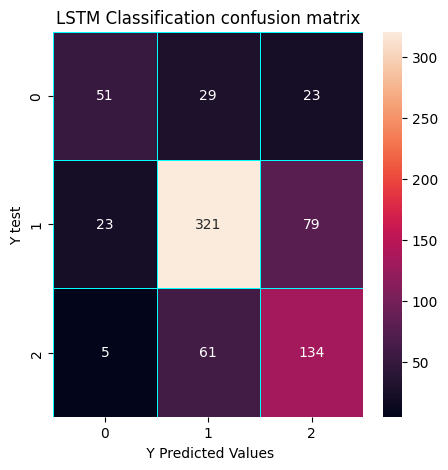

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
lstm_val = confusion_matrix(rounded_labels, yhat_classes)
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(lstm_val, annot=True,linewidth=0.7,linecolor='cyan',ax=ax, fmt='g')
plt.title('LSTM Classification confusion matrix')
plt.xlabel(' Y Predicted Values')
plt.ylabel('Y test')
plt.show()

**Validation**

In [58]:
validation_size = 610
X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
score,acc = model.evaluate(X_validate, Y_validate, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))


20/20 - 0s - 19ms/step - accuracy: 0.7000 - loss: 1.7730
score: 1.77
acc: 0.70


** Save the Lstm model**

In [59]:
model.save("lstm_sentiment_model.h5")

**validation 1**

In [60]:
message = ['The company is scheduled to release its quarterly earnings report next Monday.']
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq,maxlen=X.shape[1],dtype='int32',value=0)
pred = model.predict(padded)
labels = ['0','1','2']
print(pred,labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[[4.2993503e-05 9.9991500e-01 4.1972569e-05]] 1


In [61]:
message = ["The company reported a significant decline in revenue, causing investor confidence to drop."]
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq,maxlen=X.shape[1],dtype='int32',value=0)
pred = model.predict(padded)
labels = ['0','1','2']
print(pred,labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[9.9929833e-01 3.9117149e-05 6.6259480e-04]] 0


In [62]:
message = ["The company's quarterly earnings surpassed expectations, leading to a sharp increase in its stock price. "]
seq = tokenizer.texts_to_sequences(message)

padded = pad_sequences(seq,maxlen=X.shape[1],dtype='int32',value=0)
pred = model.predict(padded)
labels = ['0','1','2']
print(pred,labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[1.6696591e-05 1.2735895e-06 9.9998200e-01]] 2


In [ ]:
import os
os.kill(os.getpid(),9)

In [4]:
!pip install -q flask-ngrok

from flask import Flask, request, render_template_string
from flask_ngrok import run_with_ngrok
import joblib
import pickle  # Import pickle
import tensorflow as tf # Import tensorflow
import numpy as np # Import numpy for argmax
from tensorflow.keras.preprocessing.sequence import pad_sequences # Import pad_sequences


# Create a Flask app instance
app = Flask(__name__)  # Initialize Flask app
run_with_ngrok(app)  # Start ngrok when app is run


# Load your saved files (make sure they exist in Colab!)
# Assuming 'lstm_sentiment_model.h5' is your model file
model = tf.keras.models.load_model('lstm_sentiment_model.h5')

# Assuming 'tokenizer.pickle' is your tokenizer file
with open("tokenizer.pickle", "rb") as handle:
    tokenizer = pickle.load(handle)

# Simple HTML UI
html_template = """
<!DOCTYPE html>
<html>
<head>
    <title>Sentiment Analysis</title>
</head>
<body>
    <h1>Sentiment Analysis</h1>
    <form method="POST">
        <textarea name="text" placeholder="Enter text here"></textarea>
        <button type="submit">Analyze</button>
    </form>
    {% if prediction %}
        <h2>Prediction: {{ prediction }}</h2>
    {% endif %}
</body>
</html>
"""

@app.route("/", methods=["GET", "POST"])
def home():
    prediction = None
    text = ""
    if request.method == "POST":
        text = request.form["text"]

        # Tokenize and pad the input text
        seq = tokenizer.texts_to_sequences([text])
        padded = pad_sequences(seq, maxlen=50, dtype='int32', value=0)  # Adjust maxlen if needed

        # Make prediction using the loaded model
        pred = model.predict(padded)
        labels = ['negative', 'neutral', 'positive']  # Update labels as needed
        prediction = labels[np.argmax(pred)]

    return render_template_string(html_template, prediction=prediction, text=text)

app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-9:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
            

In [6]:
!pip install -q flask pyngrok

from flask import Flask, request, render_template_string
import joblib
import pickle
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pyngrok import ngrok

# 🔐 Replace this with your actual ngrok auth token
NGROK_AUTH_TOKEN = "2vkgEYmiMtsXTuyWXcXgkkKjYjz_6xPWV5j4gw8yHDoa9T2d5"

# Set up ngrok with your auth token
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Create Flask app
app = Flask(__name__)

# Load your model and tokenizer
model = tf.keras.models.load_model('lstm_sentiment_model.h5')
with open("tokenizer.pickle", "rb") as handle:
    tokenizer = pickle.load(handle)

# HTML Template
html_template = """
<!DOCTYPE html>
<html>
<head>
    <title>Sentiment Analysis</title>
</head>
<body>
    <h1>Sentiment Analysis</h1>
    <form method="POST">
        <textarea name="text" placeholder="Enter text here"></textarea>
        <button type="submit">Analyze</button>
    </form>
    {% if prediction %}
        <h2>Prediction: {{ prediction }}</h2>
    {% endif %}
</body>
</html>
"""

@app.route("/", methods=["GET", "POST"])
def home():
    prediction = None
    text = ""
    if request.method == "POST":
        text = request.form["text"]
        seq = tokenizer.texts_to_sequences([text])
        padded = pad_sequences(seq, maxlen=50, dtype='int32', value=0)
        pred = model.predict(padded)
        labels = ['negative', 'neutral', 'positive']
        prediction = labels[np.argmax(pred)]

    return render_template_string(html_template, prediction=prediction, text=text)

# 🔥 Start Flask on port 5000
port = 5000
public_url = ngrok.connect(port)
print(f" * ngrok tunnel available at: {public_url}")

app.run(port=port)


 * ngrok tunnel available at: NgrokTunnel: "https://da1d-34-169-72-97.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [15/Apr/2025 05:26:45] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/Apr/2025 05:26:46] "GET /favicon.ico HTTP/1.1" 404 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


INFO:werkzeug:127.0.0.1 - - [15/Apr/2025 05:26:51] "POST / HTTP/1.1" 200 -
